#  1. Initial Settings

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Reading the CSV file

In [16]:
df = pd.read_csv("ai_job_dataset.csv")

# 3. Removing Empty Values

In [17]:
df_cleaned = df.dropna()
filter = df_cleaned['company_location'] == 'United States'
df_cleaned = df_cleaned[filter]

# 4. Unpivoting Data

In [18]:
df_longer = df_cleaned.melt(
    id_vars="industry",
    value_vars="job_title",
    var_name="jobs"
)

# 5. Pivoting Data

In [19]:
df_pivot = df_longer.pivot_table(
    index="industry",
    columns="jobs",
    aggfunc='count'
).sort_values(by=('value', 'job_title'), ascending=True)

# 6. Settings For Plotting A Horiontal Bar Chart 

In [20]:
n_items = len(df_pivot.index)
y_pos = np.arange(n_items)
bar_height = 0.8
colors = plt.cm.Dark2.colors

# 7. Plotting A Horiontal Bar Chart

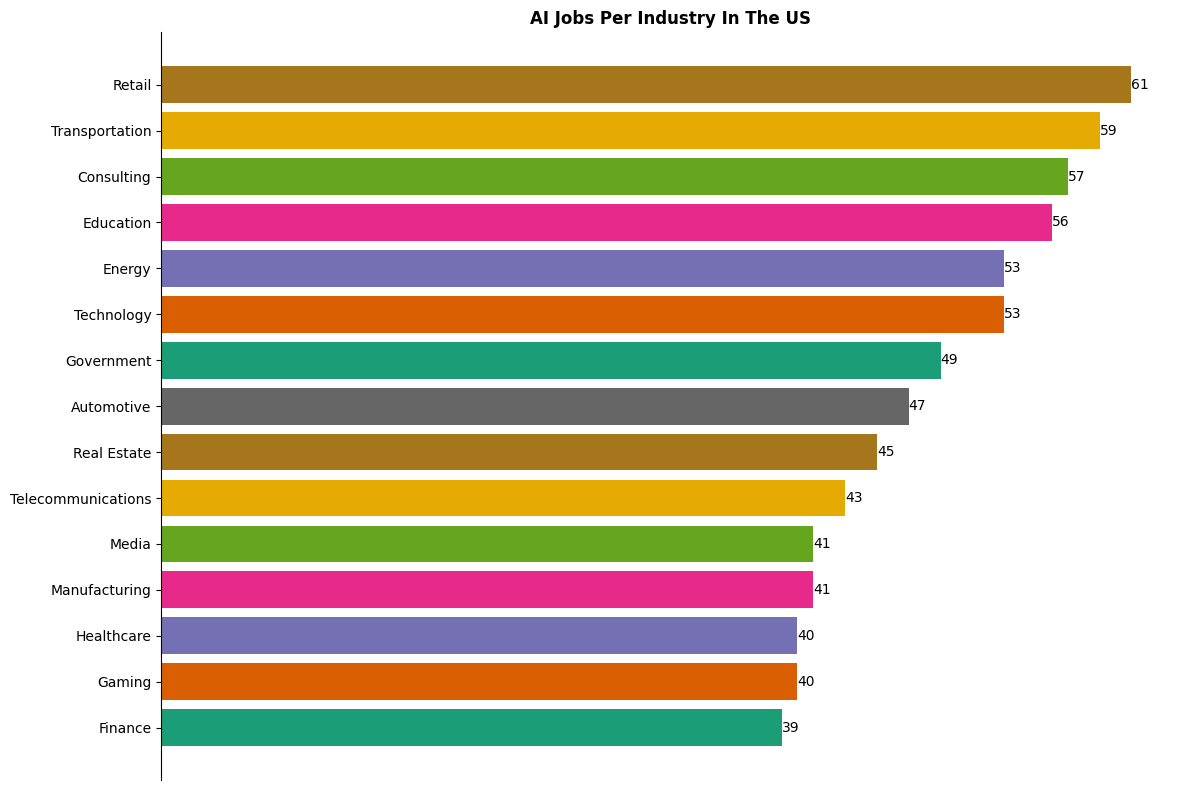

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.barh(y_pos, df_pivot['value']['job_title'], bar_height, color=colors)

ax.bar_label(bars)
ax.set_yticks(y_pos)
ax.set_yticklabels(df_pivot.index)
ax.set_title("AI Jobs Per Industry In The US", fontweight="bold")
ax.xaxis.set_visible(False)
ax.spines[['top', 'right', 'bottom']].set_visible(False)

plt.tight_layout()              
plt.show()